## IMPORT  LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv('FurniturePricePrediction.csv' , low_memory=True)
data.sample(4)

,furniture,type,url,rate,delivery,sale,price
134,Super beige sofa bed,Modern Home,https://www.jumia.com.eg//ar/big-super-sofa-be...,5.0,172.14,17%,3500.0
659,Comodeno gray,Modern Home,https://www.jumia.com.eg//ar/generic-luxury-be...,0.0,52.44,0%,3000.0
145,"Mora medical mattress, ten years guarantee. Th...",Modern Home,https://www.jumia.com.eg//ar/generic-medical-m...,5.0,172.14,20%,4999.0
332,Homztown Lounge Black,Homztown Lounge Black,https://www.jumia.com.eg//ar/homztown-lounge-b...,0.0,52.44,35%,1850.0


In [3]:
print(f' Number of Null Values : {data.isna().sum()}'
f' Shape of the data: {data.shape}')

 Number of Null Values : furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        39
dtype: int64 Shape of the data: (2000, 7)


Our data has a `shape` of (2000,7) .Therefore this is a small dataset. The dataset contains some `null` values in the price column. We shall handle this later on with different techniques.

In [4]:
data.describe()

,rate,delivery,price
count,2000.000000,2000.000000,1961.000000
mean,0.743450,142.673285,2910.418195
std,1.611737,139.339128,4002.917206
min,0.000000,10.830000,13.400000
25%,0.000000,52.440000,740.000000
50%,0.000000,172.140000,1900.000000
75%,0.000000,172.140000,4000.000000
max,5.000000,2409.900000,55000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   furniture  2000 non-null   object 
 1   type       2000 non-null   object 
 2   url        2000 non-null   object 
 3   rate       2000 non-null   float64
 4   delivery   2000 non-null   float64
 5   sale       2000 non-null   object 
 6   price      1961 non-null   float64
dtypes: float64(3), object(4)
memory usage: 109.5+ KB


In [6]:
# LOOK AT OUR DATA
data.sample(5)

,furniture,type,url,rate,delivery,sale,price
1725,Jacquard Sofa Cover 2 Seater Stretch Elastic S...,Jacquard Sofa Cover Seater Stretch Elastic S...,https://www.jumia.com.eg//ar/generic-jacquard-...,0.0,627.96,49%,3033.22
349,Large Flamingo Bean Bag,Flamingo,https://www.jumia.com.eg//ar/flamingo-large-wa...,5.0,52.44,0%,820.00
1457,Sofa Bed,Arikaty,https://www.jumia.com.eg//ar/arikaty-sofa-bed-...,0.0,172.14,17%,3999.00
614,Bed x,Rango,https://www.jumia.com.eg//ar/rango-new-bed-120...,5.0,172.14,13%,4000.00
1336,Elegant Arabic Style Paravan - Brown,Elegant Arabic Style Paravan Brown,https://www.jumia.com.eg//ar/generic-elegant-a...,0.0,52.44,0%,9500.00


In [7]:
#check for categories in type
print(data['type'].nunique())

592


In [8]:
#check the mean price of each furniture type
mean_price = data.groupby('type')['price'].mean()
mean_price

type
A  Magnetic Whiteboard Sheet For Kitchen Fridge With                            973.380000
Adjustable Angle Foldable Portable Reading Book Stand Document Holder Green     459.000000
Adjustable Anti Shake Bed Frame Tool                                                   NaN
Ahda Deco                                                                      1250.000000
Ahda Deco Classic Floral Style Fold able Tables Set    Pcs                     1850.000000
                                                                                  ...     
x   cm Bean Bag Cover Chair Gamer Seat Protection Cover In                     1281.333333
x   mm Feet Pad Skid Glide Nail Protector Chair Table                           242.000000
x   x                                                                           933.000000
x Mouse Trap Mouse Finger Live Trap Rat Trap                                    409.600000
x Rubber O Ring Oil Seal Gaskets          mm                                     61.9

In [9]:
#Fill null values with the mean of each furniture type
data['price'] = data.groupby('type')['price'].apply(lambda x: x.fillna(x.mean()))
print(data.isna().sum())

furniture     0
type          0
url           0
rate          0
delivery      0
sale          0
price        29
dtype: int64


we still have a few `null values`. This could be because some furniture types appear only once in our dataset,so the above method to `fill null values` couldn't handle this situation. Let's check the specific `furniture types` with these null values.

In [10]:
#Remaining Furniture types that have null values
furniture_null_types = data[data['price'].isnull()].groupby('type').size()
furniture_null_types

type
Adjustable Anti Shake Bed Frame Tool                     2
Beech Square Bar Chair                                   1
Caster Wheels Rubber Heavy Duty                          1
Family Bed                                              15
Fantazzia                                                7
Fishing Chair Portable Outdoor Folding Fishing Chair     1
Floral Shelf Brackets                                    1
Furniture Pad Stackable Bed Lifts Floor Protector        1
dtype: int64

In [11]:
#Let's look at the Family Bed furniture type
bed = data[data['type'] == 'Family Bed']
bed

,furniture,type,url,rate,delivery,sale,price
174,"Bed mattress, spring, separate, platinum, cm high",Family Bed,https://www.jumia.com.eg//ar/family-bed-platin...,0.0,172.14,0%,NaN
251,"Supplied bed mattress, Super Belly Top, cm high",Family Bed,https://www.jumia.com.eg//ar/family-bed-super-...,0.0,172.14,0%,NaN
253,"A bed mattress with springs attached to a ""med...",Family Bed,https://www.jumia.com.eg//ar/family-bed-connec...,0.0,172.14,0%,NaN
322,"Compressed medical sponge bed mattress, ""rebou...",Family Bed,https://www.jumia.com.eg//ar/family-bed-compre...,0.0,172.14,0%,NaN
384,"Compressed medical sponge bed mattress, ""rebou...",Family Bed,https://www.jumia.com.eg//ar/family-bed-compre...,0.0,172.14,0%,NaN
469,"Compressed medical sponge bed mattress, ""rebou...",Family Bed,https://www.jumia.com.eg//ar/family-bed-compre...,0.0,172.14,0%,NaN
476,"Bed mattress, spring, separate, Roma, height",Family Bed,https://www.jumia.com.eg//ar/family-bed-roma-p...,0.0,172.14,0%,NaN
621,"Bed mattress, spring attached, extra cm high",Family Bed,https://www.jumia.com.eg//ar/family-bed-extra-...,0.0,172.14,0%,NaN
655,"Venetian mattress, spring, separate, cm high",Family Bed,https://www.jumia.com.eg//ar/family-bed-separa...,0.0,172.14,0%,NaN
657,"Deluxe spring connected bed mattress, cm high",Family Bed,https://www.jumia.com.eg//ar/family-bed-deluxe...,0.0,172.14,0%,NaN


From the above `observation` these rows are useless since most of the columns have no beneficial `recorded data`. This could be a problem from how the data was collected. This therefore means the remaining furniture types have a similar column and trying to use them for our model would lead to `wrong predictions`. The best way to avoid this is to `drop these rows`.

In [12]:
#drop null values
data.dropna(how='any' , inplace=True)
print(data.isna().sum())

furniture    0
type         0
url          0
rate         0
delivery     0
sale         0
price        0
dtype: int64


In [13]:
#Number of times each furniture type has been purchased
type_num = data.groupby(['type'])['price'].agg(['count','mean']).reset_index()
type_num = type_num.sort_values(by='count' , ascending=False)
type_num

,type,count,mean
264,Modern Home,678,2699.205224
409,Rango,81,5110.481481
245,Marfy Touch,57,4792.982456
137,General,51,2175.490392
25,Artistico,44,4036.931818
...,...,...,...
206,In Matching Letter Game Number Math Counting...,1,760.000000
204,Ht Comfortable Medical Spine Support Seat And ...,1,769.500000
202,Homztown Sofa Beanbag Pink,1,2700.000000
201,Homztown Sofa Beanbag Blue,1,2700.000000


In [14]:
type_num.rename(inplace=True, columns={'count':'Num_of_type_bought','mean': 'Average_price_of_type'})
type_num.sample(4)

,type,Num_of_type_bought,Average_price_of_type
433,Rango Sofa Bed x cm Ottoman x cm,1,4000.0
466,Sedra Tala Waterproof Buff Orange,1,1100.0
52,Cell Foam Camping Tent Pad Indoor Outdoor,1,1951.0
248,Marvo CH Scorpion Adjustable Gaming Chair ...,1,10500.0


We can observe that `Modern Home` is the most bought furniture category in our dataset. With a mean price of £.2699

In [15]:
#Number of times each furniture product has been purchased
num_times_each_product_bought = data.groupby(['furniture'])['price'].agg(['count','mean']).reset_index()
num_times_each_product_bought = num_times_each_product_bought.sort_values(by='count' , ascending=False)
num_times_each_product_bought

,furniture,count,mean
727,"Modern capton bed, cm wood",29,4667.310345
1168,cm TV table,27,3000.000000
322,Corner bed,22,7845.136364
1005,Sofa bed,21,4618.761905
760,"Mora mattress, ten years guarantee, size is high",19,4286.421053
...,...,...,...
449,"Formula Dispenser, Baby Milk Powder Dispenser ...",1,154.000000
451,French console,1,6000.000000
452,Full Screen LCD Writing Tablet 10 Inch Erasabl...,1,959.710000
455,Furniture movers heavy objects moving kit movers,1,290.000000


In [16]:
num_times_each_product_bought.rename(inplace=True, columns={'count':'Num_of_product_bought','mean': 'Average_price_of_product'})
num_times_each_product_bought.sample(4)

,furniture,Num_of_product_bought,Average_price_of_product
432,Folding chair,1,499.0
1146,"Wood color chair, open and close, cm high",1,600.0
101,A white bed with blue roses for a master's room,1,17000.0
872,Primo Brown Sofa Bed,2,4999.5


The most bought `furniture` is `Modern capton bed, cm wood` which has been bought 29 times and has a mean price of £.4667 and the least bought product is Jacquard Sofa Cover 2 Seater Stretch Elastic Stretch

In [17]:
most_expensive_product = data.groupby(['type','furniture'])['price'].max()
print(most_expensive_product.sort_values(ascending=False))

type                                                                                        furniture                                                                                 
Art House            L shape                                                                Corner Stella                                                                                 55000.00
Hub Furniture                                                                               Young boy's bedroom brown in black                                                            50000.00
Art House                  L                                                                Latoya corner letter ( ) from Art House Furniture                                             49000.00
Art House           L shape                                                                 Corner Gold                                                                                   49000.00
Art House                            

The `Art House` furniture type is the most priced category in the dataset with a `price` of £.55000.00 and English Small Letter Bracelets Personality Round Pendant Bracelet Necklace Rose Gold is the cheapest product.

Let's merge the two dataframes of `type_num` and `num_times_each_product_bought` to our main dataframe.

In [18]:
new_df = pd.merge(
on='type',left= data , right=type_num
)
new_df.sample()

,furniture,type,url,rate,delivery,sale,price,Num_of_type_bought,Average_price_of_type
1224,"Modern capton bed, cm wood",At Home,https://www.jumia.com.eg//ar/at-home-stylish-m...,0.0,172.14,0%,5635.0,17,5379.529412


In [19]:
new_df = pd.merge(on='furniture',left=new_df , right=num_times_each_product_bought)
new_df.sample()

,furniture,type,url,rate,delivery,sale,price,Num_of_type_bought,Average_price_of_type,Num_of_product_bought,Average_price_of_product
113,Medium coffee table,Gad Woods,https://www.jumia.com.eg//ar/gad-woods-coffe-t...,0.0,172.14,0%,1800.0,13,1861.461538,5,1800.0


In [20]:
new_df.shape

(1971, 11)

In [21]:
new_df.sample(5)

,furniture,type,url,rate,delivery,sale,price,Num_of_type_bought,Average_price_of_type,Num_of_product_bought,Average_price_of_product
1056,Living room,Rango,https://www.jumia.com.eg//ar/rango-living-room...,0.0,172.14,18%,11000.0,81,5110.481481,1,11000.0
1816,Modern Home Office Desk - 90*40 - White/Red,Modern Home Office Desk White Red,https://www.jumia.com.eg//ar/generic-modern-ho...,0.0,52.44,59%,2000.0,2,2000.000000,2,2000.0
1969,Sofa Chair Bean Bag Flocking PVC Garden Lounge,Sofa Chair Bean Bag Flocking PVC Garden Lounge,https://www.jumia.com.eg//ar/generic-sofa-chai...,0.0,566.00,44%,2498.0,1,2498.000000,1,2498.0
1894,Coffee Table - 35*45*55 Cm - Brown,Coffee Table Cm Brown,https://www.jumia.com.eg//ar/generic-coffee-ta...,0.0,172.14,0%,1850.0,1,1850.000000,1,1850.0
1108,TV desk cm brown in white,Marfy Touch,https://www.jumia.com.eg//ar/marfy-touch-moder...,4.0,52.44,30%,7000.0,57,4792.982456,3,7000.0


Convert the `sale` column to float and remove `%` and divide each sell by 100 to represent the percentages.

In [22]:
new_df['sale'] = new_df['sale'].apply(lambda x : float(x.replace('%',''))/100)
new_df.sample(5)

,furniture,type,url,rate,delivery,sale,price,Num_of_type_bought,Average_price_of_type,Num_of_product_bought,Average_price_of_product
1216,Bean Togo Grand Bean Bag Waterproof,Bean GO,https://www.jumia.com.eg//ar/bean2go-grand-pvc...,0.0,52.44,0.00,1199.0,37,1389.783784,5,1239.8
332,Modern coffee table,Modern Home,https://www.jumia.com.eg//ar/modern-home-moder...,4.4,172.14,0.11,450.0,678,2699.205224,2,625.0
289,Medical back pillow for spine pain and lower b...,Modern Home,https://www.jumia.com.eg//ar/ht-medical-back-p...,0.0,52.44,0.10,445.0,678,2699.205224,1,445.0
1022,child's seat,Artistico,https://www.jumia.com.eg//ar/artistico-kids-ch...,0.0,52.44,0.27,1500.0,44,4036.931818,1,1500.0
73,cm TV table,Modern Home,https://www.jumia.com.eg//ar/generic-tv-table-...,0.0,172.14,0.68,3000.0,678,2699.205224,27,3000.0


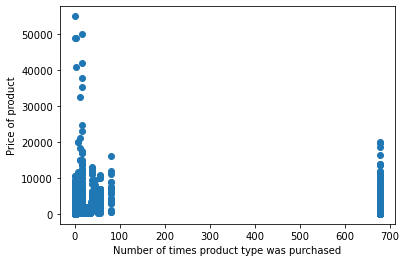

In [45]:
plt.scatter(new_df['Num_of_type_bought'] ,new_df['price'])
plt.xlabel('Number of times product type was purchased')
plt.ylabel('Price of product')
plt.show()

We can note that most product types have a `low price` regardless of the times it was `bought`. We can also note that we have outliers in our dataset.

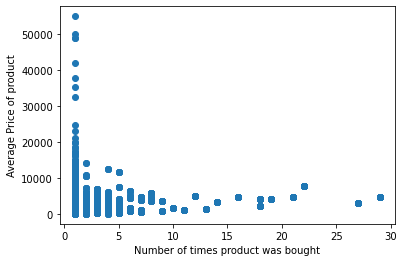

In [35]:
plt.scatter(new_df['Num_of_product_bought'] ,new_df['Average_price_of_product'])
plt.xlabel('Number of times product was bought')
plt.ylabel('Average Price of product')
plt.show()

The above plot shows that products have been bought a `few times` have `averagely higher prices` than the ones that have been purchased many times.

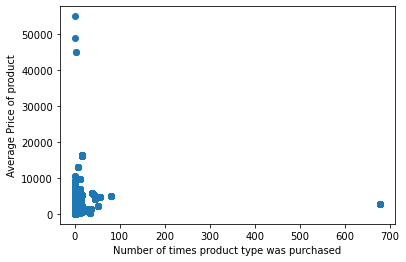

In [36]:
plt.scatter(new_df['delivery'] ,new_df['price'])
plt.xlabel('Number of times product type was purchased')
plt.ylabel('Average Price of product')
plt.show()

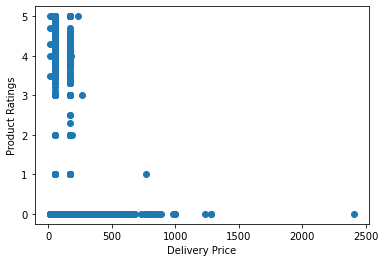

In [38]:
plt.scatter(new_df['delivery'] ,new_df['rate'])
plt.xlabel('Delivery Price')
plt.ylabel('Product Ratings')
plt.show()

We can observe that `products` with `high delivery prices` have `low ratings` compared to products with `low delivery prices`.

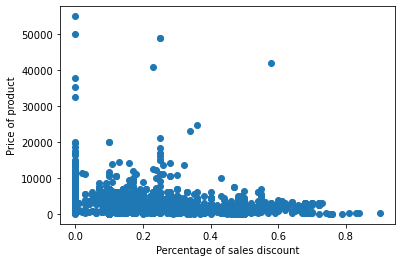

In [46]:
plt.scatter(new_df['sale'] ,new_df['price'])
plt.xlabel('Percentage of sales discount')
plt.ylabel('Price of product')
plt.show()

The above plot shows that products with `no discount sales` have `higher prices` than products with `dicount sales`. We can also observe that we have some `outliers` in our dataset.

# Feature Extraction

In [23]:
#Check feature correlation between columns
feature_corr = new_df.corr()
print(feature_corr)

                              rate  delivery      sale     price  \
rate                      1.000000 -0.110956 -0.029488 -0.020673   
delivery                 -0.110956  1.000000  0.114883  0.100966   
sale                     -0.029488  0.114883  1.000000 -0.178842   
price                    -0.020673  0.100966 -0.178842  1.000000   
Num_of_type_bought        0.030690 -0.151993 -0.122647 -0.027596   
Average_price_of_type     0.011171  0.076908 -0.185519  0.801855   
Num_of_product_bought     0.049673  0.004084  0.014589  0.097756   
Average_price_of_product -0.014082  0.102941 -0.191278  0.975159   

                          Num_of_type_bought  Average_price_of_type  \
rate                                0.030690               0.011171   
delivery                           -0.151993               0.076908   
sale                               -0.122647              -0.185519   
price                              -0.027596               0.801855   
Num_of_type_bought              

In [24]:
#check features correlation with target
feature_corr = feature_corr['price'].abs().sort_values(ascending=False)
print(feature_corr)

price                       1.000000
Average_price_of_product    0.975159
Average_price_of_type       0.801855
sale                        0.178842
delivery                    0.100966
Num_of_product_bought       0.097756
Num_of_type_bought          0.027596
rate                        0.020673
Name: price, dtype: float64


In [25]:
selected_features = feature_corr[1:7].index.to_list()

In [26]:
X = new_df[selected_features]
Y = new_df['price']
print(X.shape , Y.shape)

(1971, 6) (1971,)


# SCALING

In [51]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [52]:
Y = Y.array.reshape(-1 , 1)
scaler.fit(Y)
Y = scaler.transform(Y)
print(scaled_data , Y)

[[0.02993136 0.04520804 0.8        0.06723855 0.32142857 0.00295421]
 [0.02993136 0.04520804 0.8        0.06723855 0.32142857 0.00295421]
 [0.02993136 0.04520804 0.8        0.06723855 0.32142857 0.00295421]
 ...
 [0.00505221 0.00505221 0.18888889 0.10471558 0.         0.        ]
 [0.04517166 0.04517166 0.48888889 0.2314105  0.         0.        ]
 [0.02942214 0.02942214 0.         0.26904175 0.         0.        ]] [[0.04522193]
 [0.04522193]
 [0.04522193]
 ...
 [0.00506669]
 [0.04518555]
 [0.02943626]]


# Handle Outliers

In [62]:
# Using log Transformation
import numpy as np
df_log = np.log(scaled_data)

In [64]:
x_train , x_test , y_train , y_test = train_test_split(scaled_data , Y , test_size=0.3 ,shuffle=True ,
                                                       random_state=42)

# MODEL TRAINING AND EVALUATION

In [65]:
tree = DecisionTreeRegressor()
tree.fit(x_train , y_train)

DecisionTreeRegressor()

In [66]:

train_predictions = tree.predict(x_train)


In [70]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
r2_score(y_train ,train_predictions )

0.9957411474984823

In [76]:
test_pred = tree.predict(x_test)
print('R2Score', r2_score(y_test , test_pred))
print('Mean Abolute Error' , mean_absolute_error(y_test ,test_pred))
print('Mean squared Error' , mean_squared_error(y_test , test_pred))

R2Score 0.9843827531962742
Mean Abolute Error 0.0035358041999849314
Mean squared Error 8.814871719051341e-05


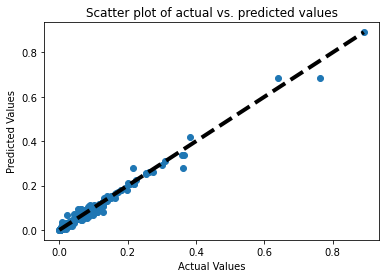

In [78]:
#Create scatter plot
plt.scatter(y_test ,test_pred)
plt.plot([min(y_test) ,max(y_test)],[min(test_pred), max(test_pred)] ,'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot of actual vs. predicted values')
plt.show()


With the above plot we can note that the model performs well since the predicted values don't fall too far away from  our line of best fit.